# Titanic Dataset analysis

The Titanic or, in full, RMS Titanic was part of the one of the most iconic tragedies of all time. RMS Titanic was a British passenger ship that hit an iceberg while on its voyage from Southampton to New York City, and sank in the North Atlantic ocean, leaving hundreds of passengers to die in the aftermath of the deadly incident. Some of the passengers who survived till help arrived were rescued while many lost their lives helplessly waiting for help to arrive.

# Problem Statement

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not

# Data Description

The task is to train a model to find if the passengers survived the Cruise sink or not. 

# Target Variable

Our target variable is 'Survived'. 

It contains the data of the passengers who has either survived or dead.

0---> Dead

1---> Survived

# Import Libraries

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [267]:
tit_df=pd.read_csv('Titanic_train.csv')
tit_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# About The Columns

Survived:

It tells whether the passenger suvived the sink or not

Pclass:

It shows to which class the particular passenger belongs to

Name and Sex:

It indicates the Name of the passengers and their genders

Age:

This column indicates the age of the passenger

SibSp:

It shows the number of siblings present for a particular passenger

Ticket and Fare:

This shows the Ticket number and the price of the ticket with which the passengers travelled.

Cabin:

THis indicates the cabin of a passengers stay.

Embarked:

This column shows the stations where the passengers have boarded the ship

In [268]:
tit_df.shape

(891, 12)

In [269]:
tit_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploration Of Data

In [270]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Check For Null Values

In [271]:
tit_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

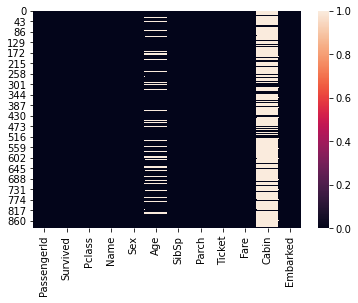

In [272]:
sns.heatmap(tit_df.isnull())

Any null values in a dataset may affect the performance of the model,

So we will handle it or remove the columns.

    Age:

    *It Contains 177 nan values out of 891 entries.

    *It can be Imputed with median to give best results.

    Cabin:

    *It contains 687 nan values out of 891 Cabin entries, 

    i.e. more than 70 percent of the total data exists as missing data,

    *so its better to drop the column from the dataset.

    Embarked :

    *This column Contains 2 nan values. So it can be Imputed with mode of existing data

# Data cleaning-To Fill The Missing Values

In [273]:
tit_df['Age'].fillna(tit_df['Age'].median(), inplace=True)

In [274]:
tit_df['Embarked'].fillna(tit_df['Embarked'].mode()[0], inplace=True)

In [275]:
tit_df['Embarked'].mode()

0    S
dtype: object

There seems to be high number of missing values in Cabin column so we cannot handle it with mean or median, so we will drop it

# Drop columns

In [276]:
tit_df=tit_df.drop(columns='Cabin', axis=1)

In [277]:
tit_df=tit_df.drop(columns='Name', axis=1)

In [278]:
tit_df=tit_df.drop(columns=['PassengerId', 'Ticket'], axis=1)

In [279]:
tit_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Check The Dependant Variable

In [280]:
tit_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

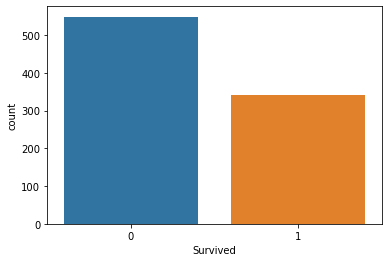

In [281]:
sns.countplot(tit_df['Survived'])
plt.show()

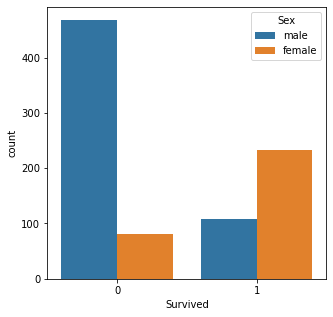

In [282]:
plt.figure(figsize=(5,5))
sns.countplot(x='Survived', hue='Sex', data=tit_df)
plt.show()

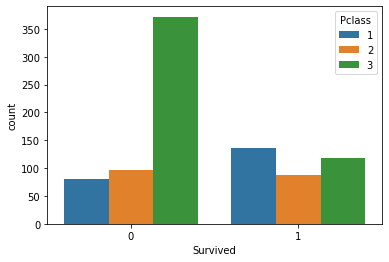

In [283]:
sns.countplot(tit_df['Survived'], hue=tit_df['Pclass'])
plt.show()

-In General, The Survival rate of the passengers are very less compared to the death rate.

-More than 50% of the females seems to have survived the cruise sink
  where as only 15% of the males survived.
  
-3rd class passengers are more likely to be dead and comparitively most first class passengers         survived the cruise sink

<AxesSubplot:xlabel='Age', ylabel='Count'>

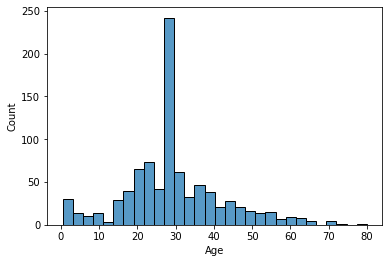

In [284]:
sns.histplot(tit_df['Age'], bins=30)

The passengers in the ship were mostly aged 20 to 40.

Very less elderly people have boarded the ship. 

There were large number of people within 27 -29 age.

The curve seems to be normal with some outliers present in it.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

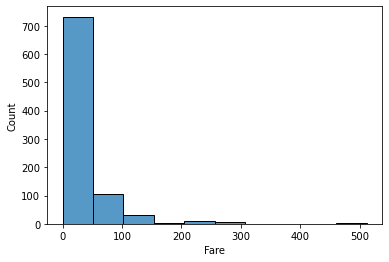

In [285]:
sns.histplot(tit_df['Fare'], bins=10)

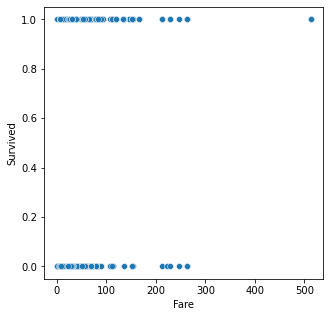

In [286]:
plt.figure(figsize=(5,5))
sns.scatterplot(y='Survived', x='Fare', data=tit_df)
plt.show()

-Fare is evenly distributed between 1 to 290 dollars.

-Most Passengers in the ship has travelled with the ticket less than 50dollars, where as a very liitle passengers have travelled with high fare.

-Passengers with relatively high fare seemed to have the better chance of survival.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

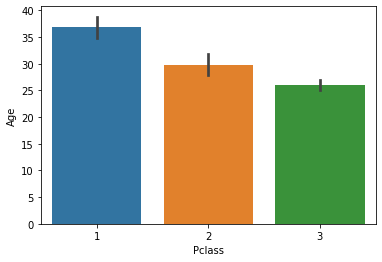

In [287]:
sns.barplot(x='Pclass', y='Age', data=tit_df)

The average age:

   -1st class passengers was 35 to 40.
    
   -2nd class passengers was 28 to 30.
    
   -3rd class passengers was 22 to 25.
    
   Elderly people seem to be more in 1st class than any other class 
    
 

# Encode the Gender And Embarked Column

In [288]:
LE= LabelEncoder()
tit_df['Sex']= LE.fit_transform(tit_df['Sex'])

In [289]:
LE.inverse_transform([1,0])

array(['male', 'female'], dtype=object)

In [290]:
tit_df['Embarked']= LE.fit_transform(tit_df['Embarked'])

In [291]:
LE.inverse_transform([2,1,0])

array(['S', 'Q', 'C'], dtype=object)

In [292]:
tit_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


Find Description 

In [293]:
tit_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


There seems to be a large gap between 75th percentile and maximum value in many columns like sibsp, Fare, Age, so there may be some outliers present.

# To Find Correlation

In [294]:
tit_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


<AxesSubplot:>

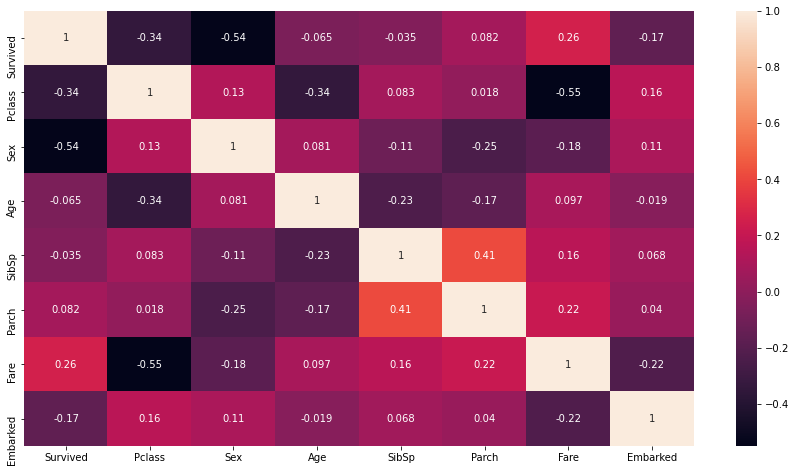

In [295]:
plt.figure(figsize=(15,8))
sns.heatmap(tit_df.corr(), annot=True)

Only Parch and Fare are positively correlated to survived. 

Parch and sibsp are correlated to eachother.

Fare is 26% correlated to Survived, which has a good bond with target. 

Whereas parch has 8.5% correlation to the target.

The other columns have no big bonding with the target.



# Check For Collinearity - VIF

In [296]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [297]:
df1=tit_df.iloc[:,1:]
df1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [298]:
df1.shape

(891, 7)

In [299]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']=df1.columns
    return(vif)

In [300]:
vif_fun()    

,vif_factor,features
0,5.701672,Pclass
1,3.081239,Sex
2,4.624923,Age
3,1.572628,SibSp
4,1.615026,Parch
5,1.669742,Fare
6,4.667593,Embarked


The columns have no collinearity. So proceeding with the dataset.

# Check For Skewness

In [301]:
df1.skew().sort_values(ascending=False)

Fare        4.787317
SibSp       3.695352
Parch       2.749117
Age         0.510245
Sex        -0.618921
Pclass     -0.630548
Embarked   -1.264823
dtype: float64

In [302]:
m= df1.columns

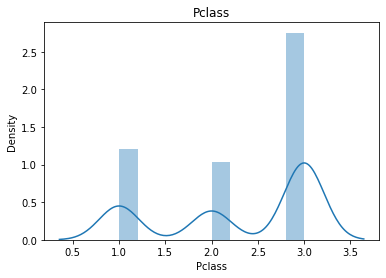

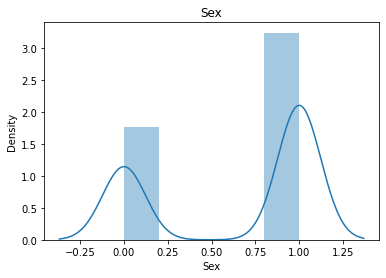

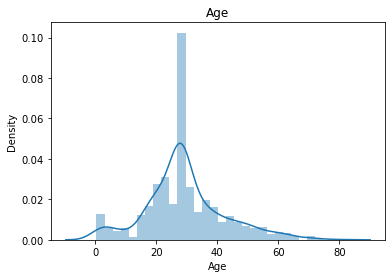

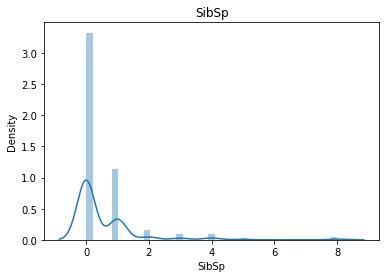

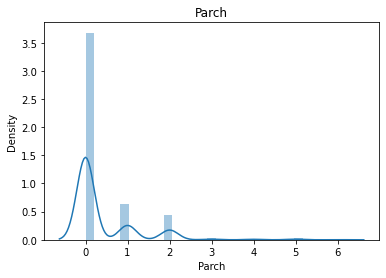

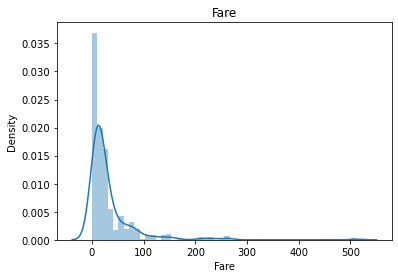

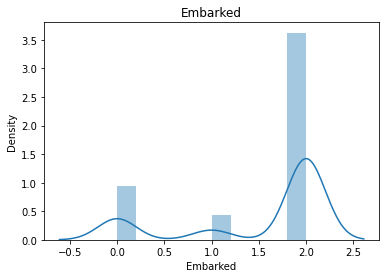

<Figure size 432x288 with 0 Axes>

In [303]:
for i in m:
    sns.distplot(df1[i])
    plt.title(i)
    plt.show()
    plt.tight_layout()

The threshold for skewness is set to -1.2 to +1.2.

Fare, Sibsp and Parch has skewness. 

we will proceed with the removal of skewness

In [304]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [305]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1_new= sc.fit_transform(df1_new)
df1_new

array([[ 0.86397329,  0.73769513, -0.52338821, ..., -0.56025296,
        -0.87882001,  0.61041095],
       [-1.45912855, -1.35557354,  0.68510924, ..., -0.56025296,
         1.33665056, -1.78052001],
       [ 0.86397329, -1.35557354, -0.20809286, ..., -0.56025296,
        -0.79006485,  0.61041095],
       ...,
       [ 0.86397329, -1.35557354, -0.05419603, ...,  1.84685634,
         0.28888536,  0.61041095],
       [-1.45912855,  0.73769513, -0.20809286, ..., -0.56025296,
         0.52790578, -1.78052001],
       [ 0.86397329,  0.73769513,  0.24710852, ..., -0.56025296,
        -0.81234947, -1.23633916]])

In [306]:
df1=pd.DataFrame(df1_new, columns= df1.columns)
df1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.863973,0.737695,-0.523388,1.373636,-0.560253,-0.878820,0.610411
1,-1.459129,-1.355574,0.685109,1.373636,-0.560253,1.336651,-1.780520
2,0.863973,-1.355574,-0.208093,-0.679850,-0.560253,-0.790065,0.610411
3,-1.459129,-1.355574,0.468033,1.373636,-0.560253,1.067352,0.610411
4,0.863973,0.737695,0.468033,-0.679850,-0.560253,-0.774439,0.610411
...,...,...,...,...,...,...,...
886,-0.592604,0.737695,-0.130855,-0.679850,-0.560253,-0.294907,0.610411
887,-1.459129,-1.355574,-0.767474,-0.679850,-0.560253,0.527906,0.610411
888,0.863973,-1.355574,-0.054196,1.373636,1.846856,0.288885,0.610411
889,-1.459129,0.737695,-0.208093,-0.679850,-0.560253,0.527906,-1.780520


In [307]:
df1.skew().sort_values(ascending=False)

Parch       1.228795
SibSp       0.808608
Age         0.074644
Fare       -0.040329
Pclass     -0.441438
Sex        -0.618921
Embarked   -1.064527
dtype: float64

In [308]:
df1.skew()[np.abs(df1.skew())<0.25].all()

True

In [309]:
skewed_data=df1.skew()
skewed_data

Pclass     -0.441438
Sex        -0.618921
Age         0.074644
SibSp       0.808608
Parch       1.228795
Fare       -0.040329
Embarked   -1.064527
dtype: float64

In [310]:
df1['Survived']=tit_df['Survived']

In [311]:
df1.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')

In [312]:
df1.shape

(891, 8)

Now the dataset cannot be normalized completely, but the skewness is reduced considerably.

So we shall proceed with the outliers monitoring and removal

# Checking For Outliers

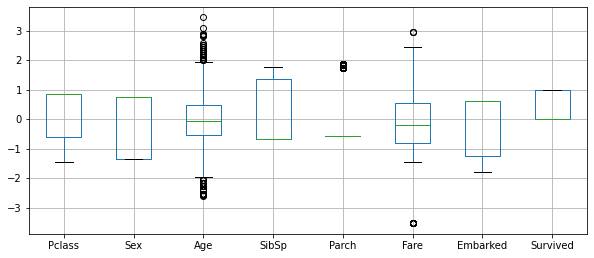

In [313]:
df1.boxplot(figsize=(10,5))
plt.subplots_adjust(bottom=0.25)
plt.show()

The columns Age, Parch, Fare have outliers in it. so we will handle it

In [314]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.86397329, 0.73769513, 0.52338821, ..., 0.87882001, 0.61041095,
        0.78927234],
       [1.45912855, 1.35557354, 0.68510924, ..., 1.33665056, 1.78052001,
        1.2669898 ],
       [0.86397329, 1.35557354, 0.20809286, ..., 0.79006485, 0.61041095,
        1.2669898 ],
       ...,
       [0.86397329, 1.35557354, 0.05419603, ..., 0.28888536, 0.61041095,
        0.78927234],
       [1.45912855, 0.73769513, 0.20809286, ..., 0.52790578, 1.78052001,
        1.2669898 ],
       [0.86397329, 0.73769513, 0.24710852, ..., 0.81234947, 1.23633916,
        0.78927234]])

In [315]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 630, 633, 674, 732,
       806, 815, 822, 851], dtype=int64), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2], dtype=int64))


In [316]:
z[179][5]

3.5340792289781473

In [317]:
df_new= df1[(z<3).all(axis=1)]
df_new

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,0.863973,0.737695,-0.523388,1.373636,-0.560253,-0.878820,0.610411,0
1,-1.459129,-1.355574,0.685109,1.373636,-0.560253,1.336651,-1.780520,1
2,0.863973,-1.355574,-0.208093,-0.679850,-0.560253,-0.790065,0.610411,1
3,-1.459129,-1.355574,0.468033,1.373636,-0.560253,1.067352,0.610411,1
4,0.863973,0.737695,0.468033,-0.679850,-0.560253,-0.774439,0.610411,0
...,...,...,...,...,...,...,...,...
886,-0.592604,0.737695,-0.130855,-0.679850,-0.560253,-0.294907,0.610411,0
887,-1.459129,-1.355574,-0.767474,-0.679850,-0.560253,0.527906,0.610411,1
888,0.863973,-1.355574,-0.054196,1.373636,1.846856,0.288885,0.610411,0
889,-1.459129,0.737695,-0.208093,-0.679850,-0.560253,0.527906,-1.780520,1


In [318]:
df_new.shape

(874, 8)

In [319]:
tit_df.shape

(891, 8)

Percentage loss

In [320]:
loss_percent= (891-874)/891*100
loss_percent

1.9079685746352413

Nearly 2% of the data are lost, 
so we will proceed with the training of the model. 


# Spliting the data and Balancing 

In [321]:
x= df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [322]:
y.value_counts()

0    534
1    340
Name: Survived, dtype: int64

The dataset is imbalanced. so we shall use SMOTE to balance the dataset

In [323]:
from imblearn.over_sampling import SMOTE

In [324]:
sm=SMOTE()
x1,y1= sm.fit_resample(x,y)

In [325]:
y1.value_counts()

0    534
1    534
Name: Survived, dtype: int64

Now the dataset is balanced, so the model can be trained well.we will proceed to train the model

The target variable is a binary variable, 

so shall use Logistic Regression as the base model to train the model.

we may try other regression models to test the dataset

# Train the Model

In [420]:
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Check the best Random State

# LogisticRegression

In [393]:
maxacc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=20,random_state=i)
    lg=LogisticRegression()
    lg.fit(xtrain,ytrain)
    predlg= lg.predict(xtest)
    acc=accuracy_score(ytest,predlg)
    if acc>maxacc:
        maxacc=acc
        maxRS=i
print("Best Accuracy_score is", maxacc, 'on Random_state',maxRS)

Best Accuracy_score is 0.95 on Random_state 11


###### From the above results:

- LogisticRegression Algorithm provides more accuracy at the Random_state 11 
    
- So we will check the Accuracy_score, Mean squared error and mean absolute error for the models with Random_state 11

    

# To Find the Best Cross Validation Score 

In [394]:
pred_tr= dtc.predict(xtrain)
pred_ts= dtc.predict(xtest)

In [395]:
train_accuracy= r2_score(ytrain,pred_tr)
test_accuracy= r2_score(ytest,pred_ts)

In [396]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lg,x1,y1,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.7790262172284644 and accuracy score for training is 0.8076075596067098 and the accuracy for testing is 0.7730390322982915


At cross fold 3 the cv score is 0.7893258426966292 and accuracy score for training is 0.8076075596067098 and the accuracy for testing is 0.7730390322982915


At cross fold 4 the cv score is 0.7883895131086143 and accuracy score for training is 0.8076075596067098 and the accuracy for testing is 0.7730390322982915


At cross fold 5 the cv score is 0.7903119652494407 and accuracy score for training is 0.8076075596067098 and the accuracy for testing is 0.7730390322982915


At cross fold 6 the cv score is 0.7893258426966293 and accuracy score for training is 0.8076075596067098 and the accuracy for testing is 0.7730390322982915


At cross fold 7 the cv score is 0.793140940586761 and accuracy score for training is 0.8076075596067098 and the accuracy for testing is 0.7730390322982915


At cross fold 8 the cv score is 0.7893965323757154 an

The cross validation score is best at cv=7 for Logistic regression.

So we shall use Cv=7 to test the  other models.

# Check The Accuracy and Error

In [397]:
xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=20,random_state=11)

# Logistic Regression

In [425]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
predlg= lg.predict(xtest)
print( confusion_matrix(predlg,ytest))
print( classification_report(predlg,ytest))
print('Score:', lg.score(xtrain,ytrain))
print('r2_score:', r2_score(predlg,ytest))

[[10  0]
 [ 1  9]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

Score: 0.7919847328244275
r2_score: 0.8


In [426]:
cr_lg=cross_val_score(lg,x1,y1, cv=7)
print('Cross Validation Score of LogisticRegression is:', cr_lg.mean())

Cross Validation Score of LogisticRegression is: 0.793140940586761


The r2_score and cv_score are nearly equal, which means the model is working well

# DecisionTreeRegressor

In [423]:
dtc=DecisionTreeRegressor()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('mean_squared_error', mean_squared_error(ytest,preddtc))
print('mean_absolute_error:', mean_absolute_error(preddtc,ytest))
print('r2_score:', r2_score(preddtc,ytest))
print('Score:', dtc.score(xtrain,ytrain))

mean_squared_error 0.2013888888888889
mean_absolute_error: 0.20833333333333334
r2_score: 0.16546762589928066
Score: 0.9594146104585876


In [427]:
cr_dtc=cross_val_score(dtc,x1,y1, cv=7)
print('Cross Validation Score of DecisionTreeRegressor is:', cr_dtc.mean())

Cross Validation Score of DecisionTreeRegressor is: 0.11659109792949936


# RandomForestRegressor

In [429]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('mean_squared_error', mean_squared_error(ytest,predrf))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))


mean_squared_error 0.10972162506456282
mean_absolute_error: 0.2374349206349206
Rf Score 0.8982124233189706
r2_score: 0.06701968886042597


In [403]:
cr_rf=cross_val_score(rf, x1,y1, cv=7)
print('Cross Validation Score of RandomForestRegressor is:', cr_rf.mean())

Cross Validation Score of RandomForestRegressor is: 0.3620949239606466


# SVR

In [430]:
svc=SVR(kernel='linear')
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
#print('acc=', accuracy_score(ytest,predsvc))
print('mean_squared_error', mean_squared_error(ytest,predsvc))
print('mean_absolute_error:', mean_absolute_error(predsvc,ytest))
svc.score(xtrain,ytrain)
print('r2_score:', r2_score(predsvc,ytest))

mean_squared_error 0.08991530759078212
mean_absolute_error: 0.17974836647178544
r2_score: 0.4329880347807875


In [431]:
cv_svc=cross_val_score(svc, x1,y1, cv=7)
print('Cross Validation Score of SVR is:', cv_svc.mean())

Cross Validation Score of SVR is: 0.1970610260469558


# Lasso Regularization

In [432]:
ls=Lasso(alpha=0.01, random_state=1)
ls.fit(xtrain,ytrain)
predls= ls.predict(xtest)
print('mean_squared_error', mean_squared_error(predls,ytest))
print('mean_absolute_error:', mean_absolute_error(predls,ytest))
print('Score:',ls.score(xtrain,ytrain) )
print('r2_score:', r2_score(predls,ytest))

mean_squared_error 0.07242051862743952
mean_absolute_error: 0.20269392277857504
Score: 0.3918711790842645
r2_score: 0.4125240312719206


In [433]:
cr_ls=cross_val_score(ls, x1,y1, cv=7)
print('Cross Validation Score of Lasso is:', cr_ls.mean())

Cross Validation Score of Lasso is: 0.3107826633712442


The error value for all the models are less than 0.5, which indicates good performance
The r2_score and CV_score for other models are not equal, which means Logistic Regression MOdel is working well with the dataset.

We will tune the Logistic Regression with Hyperparameter tuning to improve the performance of the model

# HyperParameter Tuning With GridSearchCV

In [434]:
from sklearn.model_selection import GridSearchCV

Logistic Regression

In [435]:
LogisticRegression()

LogisticRegression()

In [436]:
parameters={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'C': np.logspace(-3,2,8,12),
            'max_iter':[100,1000,2000]}           

In [437]:
GCV=GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, cv=7)

In [438]:
GCV.fit(xtrain,ytrain)

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 5.17947468e-03, 2.68269580e-02, 1.38949549e-01,
       7.19685673e-01, 3.72759372e+00, 1.93069773e+01, 1.00000000e+02]),
                         'max_iter': [100, 1000, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [439]:
GCV.best_score_

0.7833557046979865

In [440]:
GCV.best_params_

{'C': 0.001, 'max_iter': 100, 'penalty': 'none'}

In [441]:
GCV.best_estimator_

LogisticRegression(C=0.001, penalty='none')

In [445]:
GCV_pred=GCV.best_estimator_.predict(xtest)
print(r2_score(ytest,GCV_pred))
accuracy_score(ytest,GCV_pred)

0.797979797979798


0.95

After tuning the parameters, the Logistic Regression Model Shows nearly 80% accuracy. 

# ROC CURVE

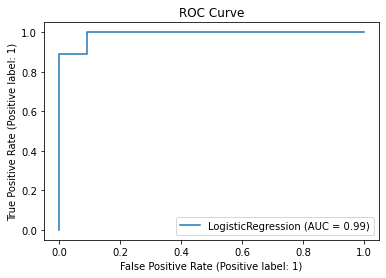

In [446]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,xtest,ytest)
plt.title('ROC Curve')
plt.show()

AUC-ROC Curve shows that the model perfoms 99% well.

Area Under Curve is 99% fit. So the model has good performance

# Save The Model

In [447]:
import pickle
filename= 'Titanic.pkl'
pickle.dump(lg,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [448]:
x=np.array(ytest)
predicted= np.array(lg.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
5,1,1
6,0,1
7,0,0
8,1,1
9,0,0


The Comparision between the original and prediccted values shows the model is 99% accurate and the Machine has trained and tested the data well.